In [1]:
import datajoint as dj
from pipeline import lab

Connecting daveliu@mesoscale-activity.datajoint.io:3306


Insert data and drop databases (Only use if you know what you are doing)

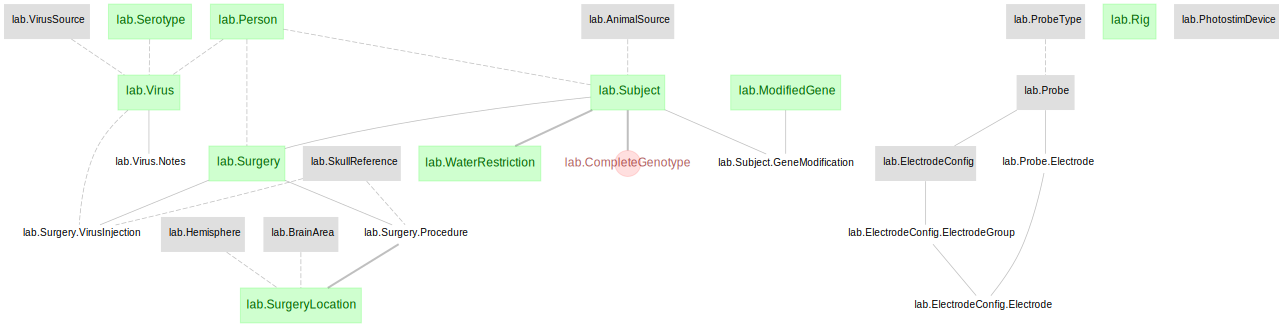

In [3]:
dj.ERD(lab)

In [4]:
lab.Person()

username,fullname
daveliu,Dave Liu
susu,Susu Chen


In [5]:
lab.Subject().insert1({
            'subject_id': 123456,
            'username': 'daveliu',
            'cage_number': 145375,
            'date_of_birth': '2017-08-03',
            'sex': 'M',
            'animal_source': 'Jackson labs'},
            skip_duplicates=True
        )

In [6]:
lab.Subject.fetch()

array([(123456, 'daveliu', 145375, datetime.date(2017, 8, 3), 'M', 'Jackson labs'),
       (412330, 'daveliu', 154522, datetime.date(2017, 12, 5), 'M', 'Jackson labs'),
       (412753, 'daveliu', 154570, datetime.date(2017, 12, 7), 'M', 'Jackson labs'),
       (413950, 'daveliu', 155585, datetime.date(2017, 12, 21), 'M', 'Jackson labs'),
       (418279, 'daveliu', 155593, datetime.date(2018, 2, 2), 'M', 'Jackson labs'),
       (428047, 'daveliu', 158986, datetime.date(2018, 5, 16), 'M', 'Jackson labs'),
       (428048, 'daveliu', 158987, datetime.date(2018, 5, 16), 'M', 'Jackson labs'),
       (432570, 'daveliu', 161126, datetime.date(2018, 6, 28), 'M', 'Jackson labs'),
       (432572, 'daveliu', 161125, datetime.date(2018, 6, 28), 'M', 'Jackson labs'),
       (432998, 'daveliu', 160920, datetime.date(2018, 7, 2), 'M', 'Jackson labs'),
       (435884, 'daveliu', 161908, datetime.date(2018, 8, 6), 'M', 'Jackson labs'),
       (439457, 'daveliu', 163374, datetime.date(2018, 9, 16), 'M', 

In [6]:
        lab.WaterRestriction.insert1({
            'subject_id': 123456,
            'water_restriction_number': 'SC011',
            'cage_number': 148861,
            'wr_start_date': '2017-11-07',
            'wr_start_weight': 25}
        )

In [7]:
(lab.WaterRestriction() & 'subject_id = 123456').delete()

About to delete:
`map_v1_lab`.`water_restriction`: 1 items
Committed.


In [10]:
(lab.Subject() & 'subject_id = 123456').delete()

About to delete:


IntegrityError: (1451, 'Cannot delete or update a parent row: a foreign key constraint fails (`daveliu_ingest_ingest_behavior`.`_behavior_ingest`, CONSTRAINT `_behavior_ingest_ibfk_1` FOREIGN KEY (`subject_id`, `session`) REFERENCES `map_v1_experiment`.`session` (`subject_id`, `session)')

In [9]:
dj.config['safemode']

True

In [2]:
from pipeline.fixes import fix_0001_photostim
fix_0001_photostim.fix_0001_photostim()

Connecting daveliu@mesoscale-activity.datajoint.io:3306


skipping date .. no valid files
skipping date .. no valid files
skipping date .. no valid files
skipping date .. no valid files


Ingest data

In [11]:
from pipeline.ingest import behavior as ingest_behavior

In [10]:
lab.Rig().insert1({
            'rig': 'RRig2',
            'room': '2w.334',
            'rig_description': 'Recording rig'},
            skip_duplicates=True
        )

In [11]:
ingest_behavior.RigDataPath().insert1({
            'rig': 'RRig2',
            'rig_data_path': r'\\Yuj10-ww3\C\Bpod Local\Data',
            'rig_search_order': 4})

In [3]:
ingest_behavior.BehaviorIngest().populate(display_progress=True)

dl11_Manual_20180110_123020.mat skipped - no animal for dl11
dl11_Manual_20180111_101802.mat skipped - no animal for dl11
dl11_Manual_20180112_071142.mat skipped - no animal for dl11
dl11_Manual_20180116_123045.mat skipped - no animal for dl11
dl11_Manual_20180117_121923.mat skipped - no animal for dl11
dl11_Manual_20180118_121214.mat skipped - no animal for dl11
dl11_Manual_20180119_103655.mat skipped - no animal for dl11
dl11_Manual_20180122_122526.mat skipped - no animal for dl11
dl11_Manual_20180123_115213.mat skipped - no animal for dl11
dl11_Manual_20180124_090546.mat skipped - no animal for dl11
dl11_Manual_20180125_091839.mat skipped - no animal for dl11
dl11_Manual_20180126_092613.mat skipped - no animal for dl11
dl11_Manual_20190124_210524.mat skipped - no animal for dl11
dl11_TW_autoTrain_20180109_113013.mat skipped - no animal for dl11
dl11_yes_no_ADS_autoTrainNew_20171204_115149.mat skipped - no animal for dl11
dl11_yes_no_ADS_autoTrainNew_20171205_094344.mat skipped - no 

In [5]:
import pipeline.tracking as tracking


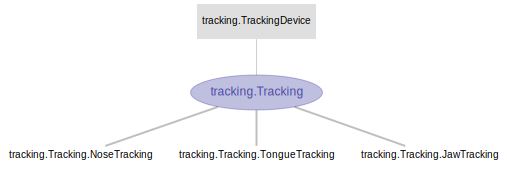

In [6]:
dj.ERD(tracking)

In [1]:
from pipeline.ingest import ephys as ingest_ephys

c:\users\liul.hhmi\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Connecting daveliu@mesoscale-activity.datajoint.io:3306


In [2]:
ingest_ephys.EphysIngest().populate(display_progress=True)

100%|████████████████████████████████████████| 575/575 [00:41<00:00, 13.94it/s]


Plot some behavior data

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io as spio
import numpy as np

In [ ]:
for i in range(len(viT_offset_file) - 1, 0, -1):
    i
    

In [8]:
import ephys
trialNote = ephys.experiment.TrialNote()

In [9]:
animal = 407513
sessionN = 2

In [10]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [11]:
outcome = (behaviorTrial & {'subject_id': animal} & {'session': sessionN}).fetch('outcome', order_by='session')
early_lick = (behaviorTrial  & {'subject_id': animal} & {'session': sessionN}).fetch('early_lick', order_by='session')

In [12]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))

In [13]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1

In [14]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

Text(0,0.5,'Proportion Correct')

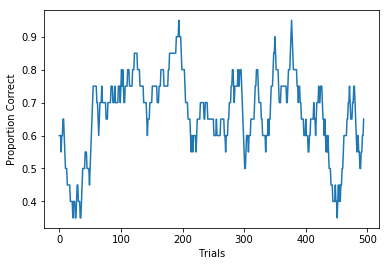

In [15]:
yMA = movingaverage(data,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')

Text(0,0.5,'Early Licks')

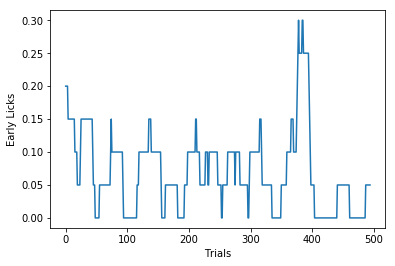

In [16]:
yMA = movingaverage(data1,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')

NameError: name 'np' is not defined